# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [29]:
# Dependencies
import json
from scipy import stats
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from pprint import pprint

from api_keys import weather_api_key

lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
lats = np.random.uniform(lat_range[0],lat_range[1],size=1500)
lngs = np.random.uniform(lng_range[0],lng_range[1],size=1500)
coordinates = zip(lats,lngs)
cities = []
for coord in coordinates : 
    city = citipy.nearest_city(coord[0],coord[1]).city_name
    if city not in cities:
        cities.append(city)
print (cities)

['yellowknife', 'mataura', 'hamilton', 'camacha', 'atuona', 'chokurdakh', 'saskylakh', 'vila', 'lebu', 'touros', 'taolanaro', 'sentyabrskiy', 'carnarvon', 'ushuaia', 'tecoanapa', 'albany', 'cidreira', 'coquimbo', 'hermanus', 'bolshaya murta', 'caravelas', 'alcains', 'saint-philippe', 'tiksi', 'toumodi', 'nyurba', 'torbay', 'butaritari', 'sisimiut', 'padang', 'port alfred', 'gobabis', 'shimoda', 'markova', 'chamonix-mont-blanc', 'port augusta', 'bredasdorp', 'bluff', 'khatanga', 'qaanaaq', 'ahuimanu', 'ucluelet', 'petropavlovsk-kamchatskiy', 'jamestown', 'grindavik', 'iwanai', 'dikson', 'rikitea', 'ust-abakan', 'nikolskoye', 'norman wells', 'ijaki', 'lima duarte', 'barrow', 'nabire', 'vaini', 'busselton', 'souillac', 'baykit', 'illoqqortoormiut', 'mar del plata', 'vila franca do campo', 'mys shmidta', 'belushya guba', 'castro', 'churapcha', 'pangani', 'kavieng', 'ahipara', 'coihaique', 'cockburn town', 'bethel', 'amberley', 'kelowna', 'pisco', 'hobyo', 'umea', 'kodiak', 'haines city', '

In [3]:
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

city_objects = []
for idx,city in enumerate (cities): 
    full_url = query_url + city
    try : 
        city_response = requests.get(full_url).json()
        c_lat = city_response["coord"]["lat"]
        c_lng = city_response["coord"]["lon"]
        temp = city_response["main"]["temp_max"]
        hum = city_response["main"]["humidity"] 
        clouds = city_response["clouds"]["all"]
        wnd = city_response["wind"]["speed"]
        cntry = city_response["sys"]["country"]
        date = city_response["dt"]
        city_objects.append({"city":city,"lat":c_lat,"lng":c_lng,"Max Temp":temp,
                             "Humidity":hum,"Cloudiness":clouds,"Wind Speed":wnd,
                             "Country":cntry,"Date":date})
        
        print (f"{str(idx)}: {city} added")
      
 
    except : 
        print (f"{idx}: {city} not found")
        pass 

0: yellowknife added
1: mataura added
2: hamilton added
3: camacha added
4: atuona added
5: chokurdakh added
6: saskylakh added
7: vila added
8: lebu added
9: touros added
10: taolanaro not found
11: sentyabrskiy not found
12: carnarvon added
13: ushuaia added
14: tecoanapa added
15: albany added
16: cidreira added
17: coquimbo added
18: hermanus added
19: bolshaya murta not found
20: caravelas added
21: alcains added
22: saint-philippe added
23: tiksi added
24: toumodi added
25: nyurba added
26: torbay added
27: butaritari added
28: sisimiut added
29: padang added
30: port alfred added
31: gobabis added
32: shimoda added
33: markova added
34: chamonix-mont-blanc added
35: port augusta added
36: bredasdorp added
37: bluff added
38: khatanga added
39: qaanaaq added
40: ahuimanu added
41: ucluelet added
42: petropavlovsk-kamchatskiy added
43: jamestown added
44: grindavik added
45: iwanai added
46: dikson added
47: rikitea added
48: ust-abakan added
49: nikolskoye added
50: norman wells 

400: owando added
401: san cristobal added
402: kavaratti added
403: victoria added
404: ondorhaan not found
405: chapais added
406: igarka added
407: omemee added
408: ozubulu added
409: moravsky krumlov added
410: redlands added
411: menongue added
412: nuuk added
413: powell added
414: yarada added
415: leeton added
416: gamba added
417: port-cartier added
418: flinders added
419: richard toll not found
420: qesarya added
421: tosya added
422: vung tau added
423: mersing added
424: satun added
425: vredendal added
426: praia added
427: koboldo not found
428: puerto el triunfo added
429: sivaki added
430: borogontsy added
431: urengoy added
432: pangody added
433: ngama added
434: birjand added
435: sangar added
436: sao filipe added
437: kudahuvadhoo added
438: puerto rico added
439: warwick added
440: faya added
441: yumen added
442: ipixuna added
443: ewa beach added
444: tasiilaq added
445: sorland added
446: biankouma added
447: sinnamary added
448: dwarka added
449: clifton add

In [15]:
city_df = pd.DataFrame(city_objects)
city_df.count()

city          568
lat           568
lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
city_df.to_csv("new_cities.csv",index_label="city_id")

In [17]:
city_df.describe()

,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,5.680000e+02
mean,20.083452,14.882301,61.954560,67.734155,54.042254,7.786725,1.619903e+09
std,33.261647,89.780099,19.065146,22.969378,38.833316,5.335502,9.163417e+01
min,-54.800000,-175.200000,10.540000,4.000000,0.000000,0.090000,1.619902e+09
25%,-6.848625,-63.923750,48.200000,55.750000,14.750000,3.520000,1.619903e+09
50%,26.154450,16.943450,64.990000,73.000000,62.000000,6.910000,1.619903e+09
75%,47.716625,91.441125,78.010000,86.000000,92.250000,10.360000,1.619903e+09
max,78.218600,178.416700,98.580000,100.000000,100.000000,36.820000,1.619903e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [20]:
test = city_df[city_df["Humidity"]>100]
test

,city,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

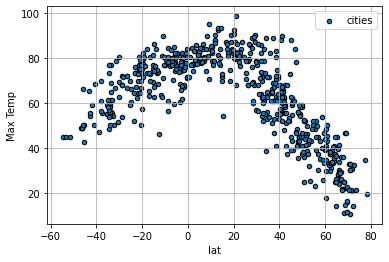

In [24]:
city_df.plot.scatter(x="lat",y="Max Temp", edgecolor = "black", label = "cities")
plt.grid(True)
plt.savefig("lat v temp.png")
plt.show()

## Latitude vs. Humidity Plot

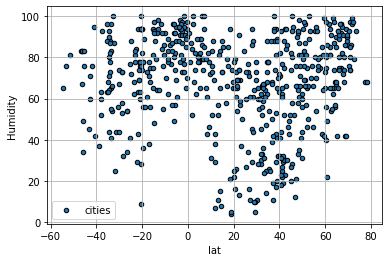

In [25]:
city_df.plot.scatter(x="lat",y="Humidity", edgecolor = "black", label = "cities")
plt.grid(True)
plt.savefig("lat v temp.png")
plt.show()

## Latitude vs. Cloudiness Plot

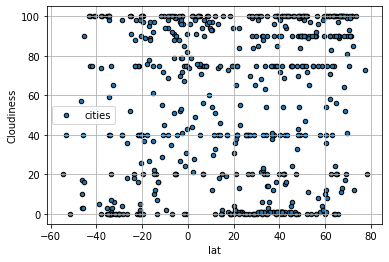

In [26]:
city_df.plot.scatter(x="lat",y="Cloudiness", edgecolor = "black", label = "cities")
plt.grid(True)
plt.savefig("lat v temp.png")
plt.show()

## Latitude vs. Wind Speed Plot

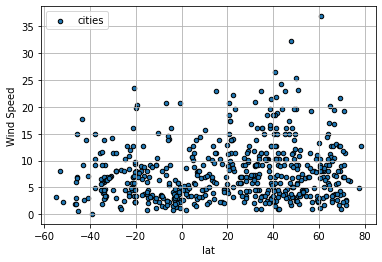

In [27]:
city_df.plot.scatter(x="lat",y="Wind Speed", edgecolor = "black", label = "cities")
plt.grid(True)
plt.savefig("lat v temp.png")
plt.show()

## Linear Regression

In [91]:
n_df = city_df.loc[city_df["lat"]>=0]
s_df = city_df.loc[city_df["lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [92]:
x_values = n_df['lat']
y_values = n_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
print(regress_values)

0      36.959815
2      58.955031
3      64.720309
5      29.231350
6      28.018393
         ...    
560    65.838660
563    54.638987
564    65.082570
565    95.231646
566    36.027273
Name: lat, Length: 384, dtype: float64


In [93]:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.95x +95.99


The r-value is: 0.7661836838982102


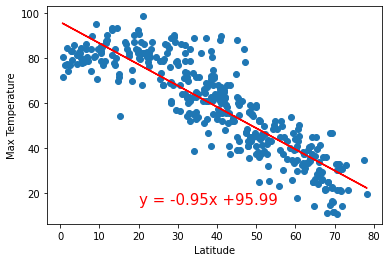

In [94]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [95]:
x_val = s_df['lat']
y_val = s_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_val, y_val)

regress_value = x_val * slope + intercept
print(regress_value)

1      54.835279
4      74.505099
8      59.470505
9      76.991939
10     66.361727
         ...    
558    67.911145
559    76.106727
561    77.774619
562    68.593403
567    58.722848
Name: lat, Length: 184, dtype: float64


In [96]:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.54x +79.8


The r-value is: 0.46676903093349936


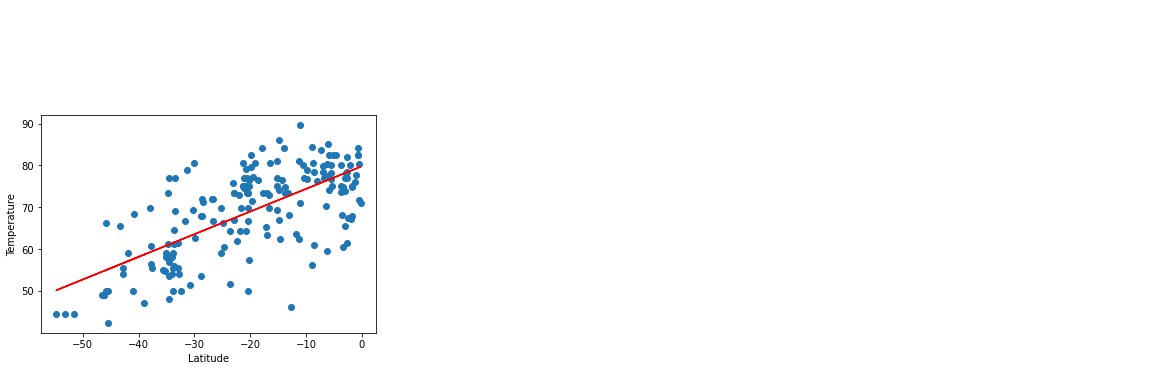

In [97]:
# Create Plot
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_value,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(120,115),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [98]:
x_v= n_df['lat']
y_v = n_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_v, y_v)

regress_values = x_v * slope + intercept
print(regress_values)

0      69.863193
2      64.469326
3      63.055512
5      71.758438
6      72.055891
         ...    
560    62.781259
563    65.527745
564    62.966674
565    55.573243
566    70.091880
Name: lat, Length: 384, dtype: float64


In [99]:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.23x +55.39


The r-value is: 0.0351352517383069


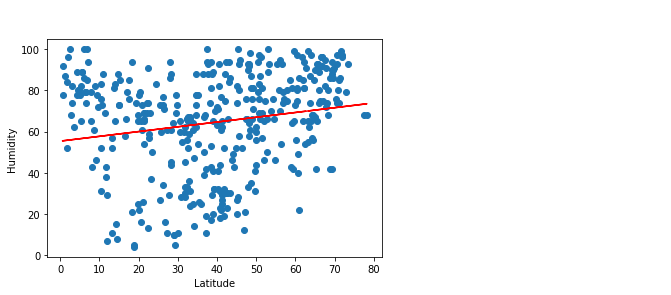

In [100]:
# Create Plot
plt.scatter(x_v,y_v)
plt.plot(x_v,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(120,115),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [101]:
x_vs= s_df['lat']
y_vs = s_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_vs, y_vs)

regress_values = x_vs * slope + intercept
print(regress_values)

1      62.840149
4      79.149969
8      66.683585
9      81.212006
10     72.397649
         ...    
558    73.682394
559    80.478007
561    81.860990
562    74.248109
567    66.063643
Name: lat, Length: 184, dtype: float64


In [102]:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.45x +83.54


The r-value is: 0.11139385129786436


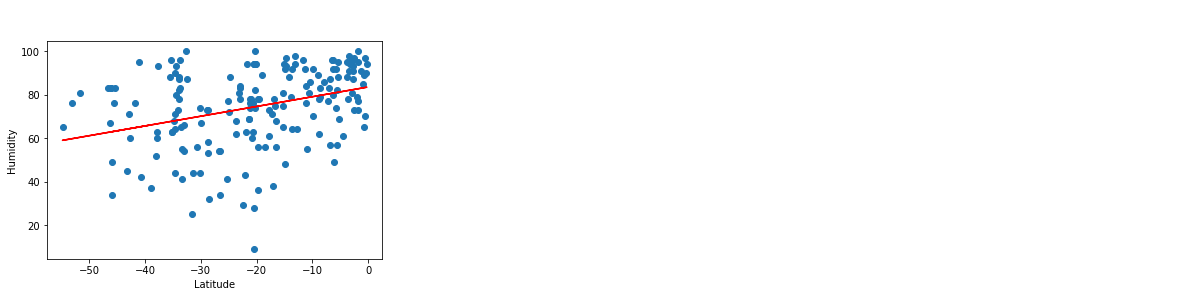

In [103]:
# Create Plot
plt.scatter(x_vs,y_vs)
plt.plot(x_vs,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(120,115),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [104]:
x = n_df['lat']
y = n_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)

regress_values = x * slope + intercept
print(regress_values)

0      61.695389
2      55.081748
3      53.348213
5      64.019226
6      64.383945
         ...    
560    53.011941
563    56.379520
564    53.239287
565    44.173899
566    61.975791
Name: lat, Length: 384, dtype: float64


In [105]:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.28x +43.95


The r-value is: 0.020456427412143784


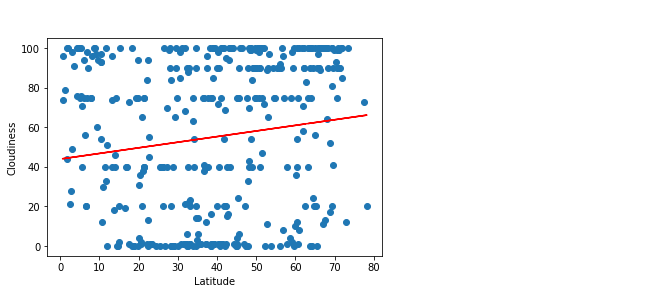

In [106]:
# Create Plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(120,115),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [109]:
x_map = s_df['lat']
y_map = s_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_map, y_map)

regress_values = x_map * slope + intercept
print(regress_values)

1      31.950073
4      59.798494
8      38.512600
9      63.319347
10     48.269154
         ...    
558    50.462810
559    62.066070
561    64.427462
562    51.428747
567    37.454071
Name: lat, Length: 184, dtype: float64


In [110]:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.77x +67.3


The r-value is: 0.07355716500169766


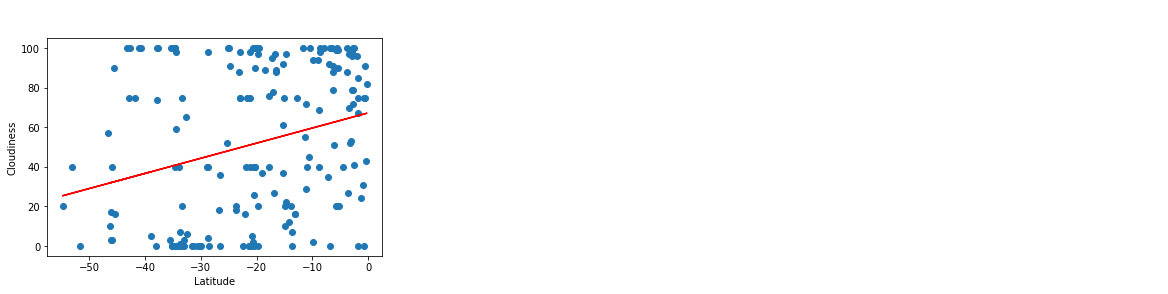

In [111]:
# Create Plot
plt.scatter(x_map,y_map)
plt.plot(x_map,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(120,115),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [113]:
x_maps = n_df['lat']
y_maps = n_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_maps, y_maps)

regress_values = x_maps * slope + intercept
print(regress_values)

0      8.720870
2      8.500618
3      8.442887
5      8.798260
6      8.810406
         ...   
560    8.431688
563    8.543837
564    8.439259
565    8.137358
566    8.730208
Name: lat, Length: 384, dtype: float64


In [114]:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.01x +8.13


The r-value is: 0.0011103695118007413


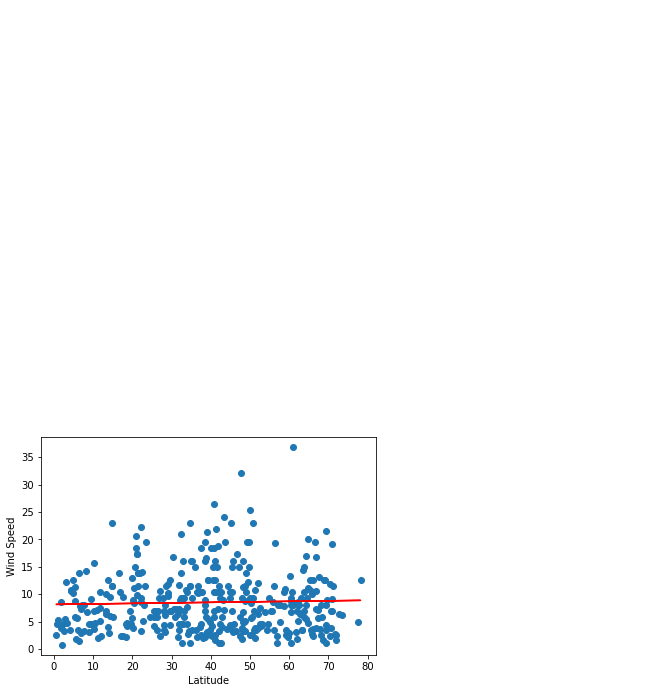

In [115]:
# Create Plot
plt.scatter(x_maps,y_maps)
plt.plot(x_maps,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(120,115),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [116]:
x_mapplot = s_df['lat']
y_mapplot = s_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_mapplot, y_mapplot)

regress_values = x_mapplot * slope + intercept
print(regress_values)

1      7.292163
4      5.880748
8      6.959561
9      5.702304
10     6.465079
         ...   
558    6.353900
559    5.765823
561    5.646142
562    6.304944
567    7.013209
Name: lat, Length: 184, dtype: float64


In [118]:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.04x +5.5


The r-value is: 0.014115379276834834


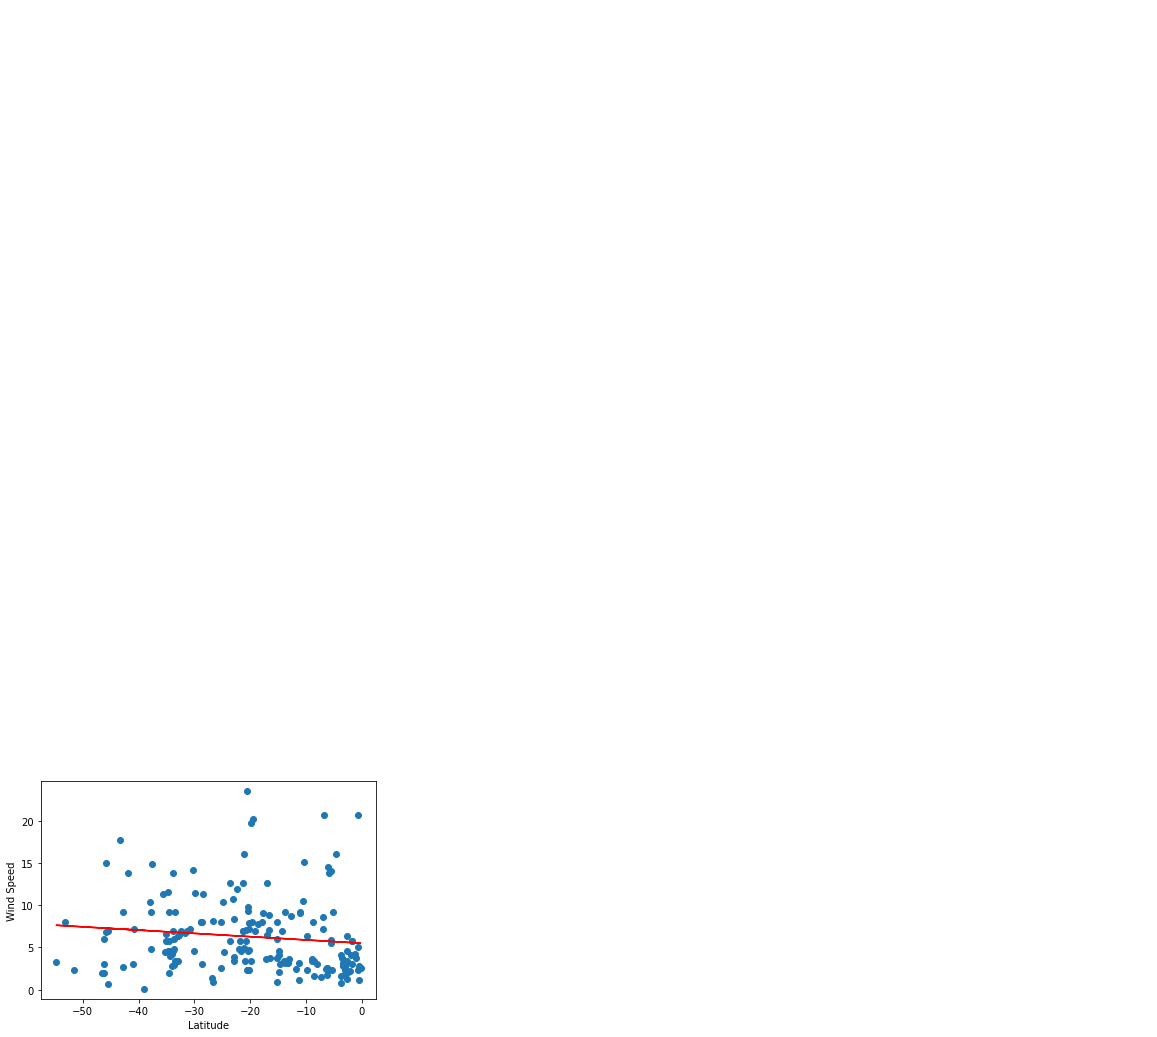

In [119]:
# Create Plot
plt.scatter(x_mapplot,y_mapplot)
plt.plot(x_mapplot,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(120,115),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()